# Общий финансовый анализ на Python (Часть 3)
> General Financial Analysis in Python (Part 3)

- toc: true
- branch: master
- badges: true
- comments: true
- author: Zmey56
- categories: [russian, machine learning, algotrading]

После всех вычислений, приведенных в прошлых двух публикациях, можно углубиться в статистический анализ и рассмотреть метод наименьших квадратов. Для этой цели используется библиотека statsmodels, которая позволяет пользователям исследовать данные, оценивать статистические модели и выполнять статистические тесты. За основу были взяты эта статья и эта статья. Само описание используемой функции на английском доступно по следующей ссылке.

Сначала немного теории:

**О линейной регрессии**

Линейная регрессия используется в качестве прогнозирующей модели, когда предполагается линейная зависимость между зависимой переменной (переменная, которую мы пытаемся предсказать) и независимой переменной (переменная и/или переменные, используемые для предсказания).

В самом простой случае при рассмотрении используется одна переменная на основании которой мы пытаемся предсказать другую. Формула в этом случае имеет следующий вид:

Y = C + M*X

* Y - зависимая переменная (результат / прогноз / оценка)
* C - Константа (Y-Intercept)
* M - Наклон линии регрессии (угловой коэффициент или градиент оценённой линии; она представляет собой величину, на которую Y увеличивается в среднем, если мы увеличиваем X на одну единицу)
* X - независимая переменная (предиктор, используемый в прогнозе Y)

В действительности так же может существовать связь между зависимой переменной и несколькими независимыми переменными. Для этих типов моделей (при условии линейности) мы можем использовать множественную линейную регрессию следующего вида:

Y = C + M1X1 + M2X2 + …

**Бета — коэффициент**

Про данный коэффициент написано уже много, для примера на этой странице

Коротко, если не вдаваться в подробности, то можно его охарактеризовать следующим образом:

Акции c бета-коэффициентом:

* ноль указывает на отсутствие корреляции между акцией и индексом
* единица указывает на то, что акция имеет ту же волатильность, что и индекс
* больше одного — указывает на большую доходность (а следовательно и риски) акции, чем индекс
* менее единицы — менее волатильная акция, чем индекса

Другими словами, если акция увеличится на 14%, в то время как рынок вырос всего на 10%, то бета-коэффициент акции составит 1,4. Как правило на рынках с более высоким бета-коэффициентом можно предположить лучшие условия для вознаграждения (а следовательно и для риска).

$\beta(x)$ = $Cov(r_i,r_m)\over\delta^2_m$

где:
* $r_i$ - доходность i-акции(инвестиционного портфеля);
* $r_m$ - рыночная доходность;
* $\delta^2_m$ - дисперсия рыночной доходности.

**Практика**

Следующий код Python включает в себя пример линейной регрессии, где входной переменной является доходность по Индексу МосБиржи, а оцениваемая переменная — доходность по акциям Аэрофлот.

Для того, чтобы отсутствовала необходимость вспоминать как загружать данные и приводить данные к форме, необходимой для расчета — код приводиться с момента загрузки данных и до получения результатов. Вот полный синтаксис для выполнения линейной регрессии в Python с использованием statsmodels:

In [3]:
#Загружаем библиотеки
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Загружаю данные
ticker = ['AFLT.ME','IMOEX.ME']
stock = yf.download(ticker)

# Выделение скорректированой цены закрытия
all_adj_close = stock[['Adj Close']]

# Вычисление доходности 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Выделение доходности по акциям  
aflt_returns = all_returns['Adj Close'][['AFLT.ME']].fillna(0)

# Выделение доходности по индексу МосБиржи 
moex_returns = all_returns['Adj Close'][['IMOEX.ME']].fillna(0)


# Создание нового DataFrame

return_data = pd.concat([aflt_returns, moex_returns], axis=1)[1:]
return_data.columns = ['AFLT.ME', 'IMOEX.ME']


# Добавляем столбец единиц и определяем X и y
X = sm.add_constant(return_data['IMOEX.ME'])
y = return_data['AFLT.ME']


# Создание модели
model_moex = sm.OLS(y,X).fit()

# Вывод результатов
print(model_moex.summary())

[*********************100%***********************]  2 of 2 completed
                            OLS Regression Results                            
Dep. Variable:                AFLT.ME   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     454.5
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           7.89e-94
Time:                        19:33:22   Log-Likelihood:                 7260.3
No. Observations:                2909   AIC:                        -1.452e+04
Df Residuals:                    2907   BIC:                        -1.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

На сайте yahoo и Мосбиржи бета коэффициент отличается незначительно в большую сторону. Но надо честно признаться, что расчет для некоторых других акций с российской биржи показал более значительные отличия, но в пределах интервала.

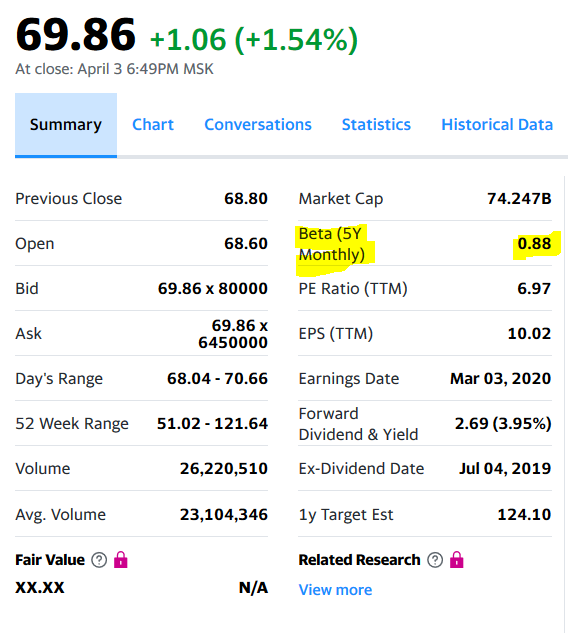

Тот же анализ для акции FB и индекса SP500. Здесь вычисление, как в оригинале, проводится через месячную доходность.

In [9]:
sp_500 = yf.download('^GSPC')
fb = yf.download('FB')

# Пересчет в месячную доходность
fb = fb.resample('BM').apply(lambda x: x[-1])
sp_500 = sp_500.resample('BM').apply(lambda x: x[-1])

monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  

X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

X1 = sm.add_constant(X)

model_fb_sp_500 = sm.OLS(y, X1)

results_fb_sp_500 = model_fb_sp_500.fit()
print(results_fb_sp_500.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     24.59
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           2.56e-06
Time:                        19:47:24   Log-Likelihood:                 110.11
No. Observations:                 113   AIC:                            -216.2
Df Residuals:                     111   BIC:                            -210.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

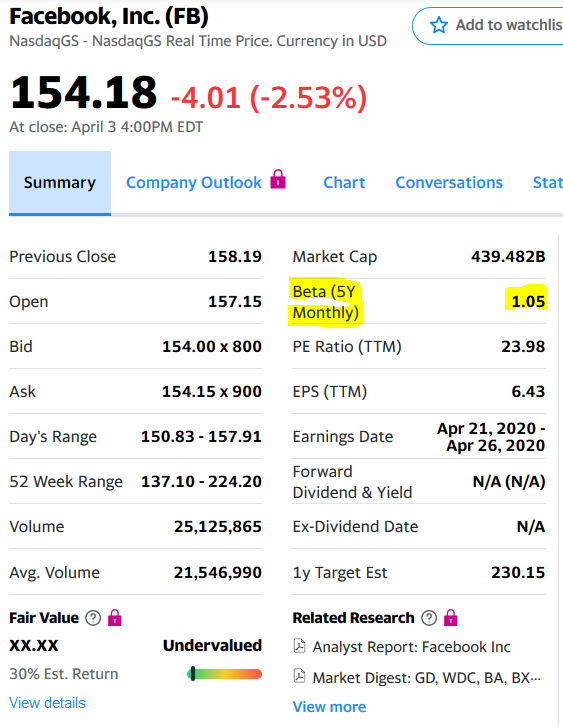

В этом случае так же немного не совпало, но при этом подтвердило возможность использование statsmodels для определения коэффициента бета.

Ну и в качестве бонуса — если Вы хотите получить только бета — коэффициент и остальную статистику вы хотите оставить в стороне, то предлагается еще один код для его расчета:

In [10]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

1.1515416131106546


Правда это не означает, что всю остальные получаемые значения надо игнорировать, но для их понимания понадобятся знание статистики. Приведу небольшую выдержку из получаемых значений:

* R-squared, который является коэффициентом детерминации и принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость;
* Adj. R-squared — скорректированный R-squared на основании числа наблюдений и числа степеней свободы;
* std err — стандартная ошибка оценки коэффициента;
* P>|t| — р-значение Величина менее 0,05 считается статистически значимой;
* 0.025 и 0.975 — нижнее и верхнее значения доверительного интервала.
* и т.д.

На этом пока что все. Конечно, представляет интерес поискать зависимость между различными величинами для того, чтобы через одну предсказать другую и получить профит. В одном из иностранных источников встретилось предсказание индекса через процентную ставку и уровень безработицы. Но если изменение процентной ставки в России можно взять с сайта Центробанка, то другие пока продолжаю искать. К сожалению, на сайте Росстата не удалось найти актуальные. Это заключительная публикация в рамках статей общего финансового анализа.